## working on the shape file of glen eira to extract the points of interests places

Since we are dealing with a geo pandas shape file and extracting data from that, python provides some advanced libraries to make our function and work easier

In [5]:
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import earthpy as et
import pandas as pd
shapefile = gpd.read_file("FOI_POINT.shp") #shape file of point_of_interest of glen eira

In [82]:
type(shapefile)

geopandas.geodataframe.GeoDataFrame

In [7]:
glen_eir_4000_df = pd.DataFrame(shapefile) #ci=inverting the shape into the pandas dataframe, pandas df are ease to use

In [11]:
glen_eir_4000_df.FTYPE.value_counts()

care facility            503
recreational resource    364
sign                     243
education centre         202
place of worship         163
community venue          104
landmark                  97
hospital                  48
communication service     37
emergency facility        35
cultural centre           30
admin facility            13
commercial facility        9
sport facility             7
health facility            7
excavation site            4
dumping ground             3
defence site               2
storage facility           1
industrial facility        1
Name: FTYPE, dtype: int64

In [30]:
#glen_eir_4000_df.to_csv("glen_eira_poi.csv")

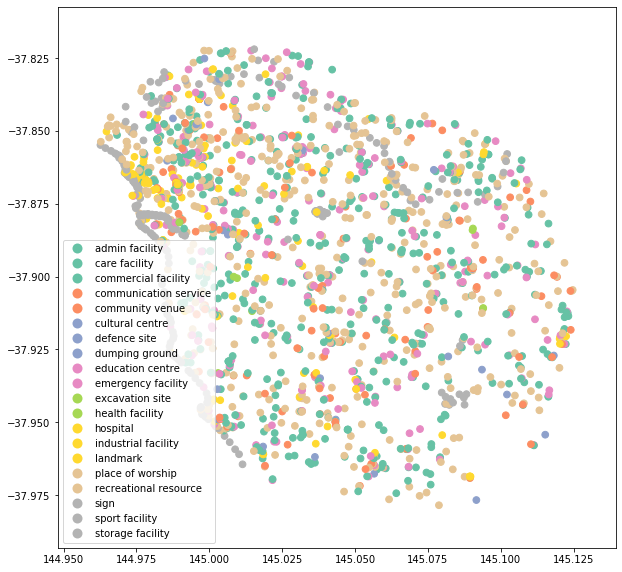

In [14]:
#plotting the shape file to see and get a brief idea of what all we have in this. Seeing the dataframe gives a vague idea
#but visualizing it will provide a good in depth information of the data we have

fig, ax = plt.subplots(figsize = (10,10))
shapefile.plot(column='FTYPE', 
                         categorical=True, 
                         legend=True, 
                         figsize=(10,6),
                         markersize=45, 
                         cmap="Set2", ax=ax)

In [15]:
shape_file2 = gpd.read_file("EXTRACT_POLYGON.shp")

In [42]:
index_values = glen_eir_4000_df.index[glen_eir_4000_df["NAME"].isnull()].tolist() #

In [1]:
#len(index_values)

In [44]:
glen_eir_4000_df

,UFI,PFI,FEATURE_ID,PARENTFTID,FTYPE,FEATSUBTYP,FEATSTATUS,NAME,NAME_LABEL,PARENTNAME,...,VMADD_PFI,VICNAMESID,VICNMSTATC,THEME1,THEME2,STATE,CRDATE_PFI,SUPER_PFI,CRDATE_UFI,geometry
0,48772376,997288,997288,0,community venue,hall,None,CHURCH HALL,Church Hall,None,...,420823904,-1383470,11,None,None,VIC,2013-12-19,0,2015-10-30,POINT (145.00832 -37.93399)
1,48772375,997263,997263,0,place of worship,church,None,OUR LADY OF PERPETUAL SUCCOUR CATHOLIC CHURCH,Our Lady Of Perpetual Succour Catholic Church,None,...,420823904,-1383425,11,None,None,VIC,2013-12-19,0,2015-10-30,POINT (145.00833 -37.93382)
2,55841715,997144,997144,70885,recreational resource,playground,None,None,None,HAMPTON HIGH RESERVE,...,None,-1383165,11,None,None,VIC,2013-12-18,0,2019-02-27,POINT (145.00581 -37.93298)
3,55841625,997280,997280,0,health facility,maternal/child health centre,None,HAMPTON MATERNAL AND CHILD HEALTH CENTRE,Hampton Maternal And Child Health Centre,None,...,None,-1383423,11,None,None,VIC,2013-12-19,0,2019-02-27,POINT (145.00299 -37.93309)
4,55843899,997287,997287,1005625,place of worship,church,None,ST MARYS CATHOLIC CHURCH,St Marys Catholic Church,None,...,None,-1383456,11,None,None,VIC,2013-12-19,0,2019-02-27,POINT (145.00074 -37.93324)
5,55844266,997261,997261,0,community venue,senior citizens,None,HAMPTON RSL,Hampton Rsl,None,...,426522358,-1383446,11,None,None,VIC,2013-12-19,0,2019-02-27,POINT (144.99641 -37.93260)
6,51319094,997143,997143,635338,recreational resource,playground,None,None,None,HOLYROOD STREET RESERVE,...,54598960,-1383166,11,None,None,VIC,2013-12-18,0,2016-09-14,POINT (144.99510 -37.93299)
7,47483028,997250,997250,0,place of worship,church,None,ST PETERS ANGLICAN CHURCH,St Peters Anglican Church,None,...,221713242,-1383469,11,None,None,VIC,2013-12-19,0,2015-05-27,POINT (144.99696 -37.92503)
8,55843589,997272,997272,0,place of worship,church,None,ST LEONARDS UNITING CHURCH,St Leonards Uniting Church,None,...,50247018,-1383432,11,None,None,VIC,2013-12-19,0,2019-02-27,POINT (144.99474 -37.92629)
9,51321471,997115,997115,997075,recreational resource,playground,None,None,None,BRIGHTON BEACH OVAL,...,53633402,-1383132,11,None,None,VIC,2013-12-18,0,2016-09-14,POINT (144.99171 -37.92825)


In [45]:
 glen_eir_4000_df = glen_eir_4000_df.dropna(how='any',axis=0)  # if there are any null values. we are dropping those

In [46]:
index_values2 = glen_eir_4000_df.index[glen_eir_4000_df["NAME"].isnull()].tolist()

In [47]:
len(index_values2)

85

In [48]:
len(glen_eir_4000_df)

1873

In [49]:
glen_eir_4000_df = glen_eir_4000_df.dropna(axis=0, subset=['NAME'])

In [50]:
len(glen_eir_4000_df)

1788

In [51]:
glen_eir_4000_df.columns

Index(['UFI', 'PFI', 'FEATURE_ID', 'PARENTFTID', 'FTYPE', 'FEATSUBTYP',
       'FEATSTATUS', 'NAME', 'NAME_LABEL', 'PARENTNAME', 'CHILDEXIST',
       'AUTHORGC', 'AUTHORGID', 'AUTHORGVER', 'VMADD_PFI', 'VICNAMESID',
       'VICNMSTATC', 'THEME1', 'THEME2', 'STATE', 'CRDATE_PFI', 'SUPER_PFI',
       'CRDATE_UFI', 'geometry'],
      dtype='object')

In [64]:
type(glen_eir_4000_df['geometry'][1]) #checking the data type of the cooridnate points in the dataframe

shapely.geometry.point.Point

In [69]:
glen_eir_4000_df['lon'] = shapefile['geometry'].x #extracting and converting the longitude poitn from  shapely.geometry.point.Point to a numeric
glen_eir_4000_df['lat'] = shapefile['geometry'].y #extracting and converting the latitude poitn from  shapely.geometry.point.Point to a numeric

/Users/srikarmanthatti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/srikarmanthatti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [70]:
glen_eir_4000_df

,UFI,PFI,FEATURE_ID,PARENTFTID,FTYPE,FEATSUBTYP,FEATSTATUS,NAME,NAME_LABEL,PARENTNAME,...,VICNMSTATC,THEME1,THEME2,STATE,CRDATE_PFI,SUPER_PFI,CRDATE_UFI,geometry,lon,lat
0,48772376,997288,997288,0,community venue,hall,None,CHURCH HALL,Church Hall,None,...,11,None,None,VIC,2013-12-19,0,2015-10-30,POINT (145.00832 -37.93399),145.008318,-37.933991
1,48772375,997263,997263,0,place of worship,church,None,OUR LADY OF PERPETUAL SUCCOUR CATHOLIC CHURCH,Our Lady Of Perpetual Succour Catholic Church,None,...,11,None,None,VIC,2013-12-19,0,2015-10-30,POINT (145.00833 -37.93382),145.008333,-37.933823
2,55841715,997144,997144,70885,recreational resource,playground,None,HAMPTON HIGH RESERVE,None,HAMPTON HIGH RESERVE,...,11,None,None,VIC,2013-12-18,0,2019-02-27,POINT (145.00581 -37.93298),145.005810,-37.932980
3,55841625,997280,997280,0,health facility,maternal/child health centre,None,HAMPTON MATERNAL AND CHILD HEALTH CENTRE,Hampton Maternal And Child Health Centre,None,...,11,None,None,VIC,2013-12-19,0,2019-02-27,POINT (145.00299 -37.93309),145.002993,-37.933087
4,55843899,997287,997287,1005625,place of worship,church,None,ST MARYS CATHOLIC CHURCH,St Marys Catholic Church,None,...,11,None,None,VIC,2013-12-19,0,2019-02-27,POINT (145.00074 -37.93324),145.000735,-37.933241
5,55844266,997261,997261,0,community venue,senior citizens,None,HAMPTON RSL,Hampton Rsl,None,...,11,None,None,VIC,2013-12-19,0,2019-02-27,POINT (144.99641 -37.93260),144.996414,-37.932597
6,51319094,997143,997143,635338,recreational resource,playground,None,HOLYROOD STREET RESERVE,None,HOLYROOD STREET RESERVE,...,11,None,None,VIC,2013-12-18,0,2016-09-14,POINT (144.99510 -37.93299),144.995097,-37.932987
7,47483028,997250,997250,0,place of worship,church,None,ST PETERS ANGLICAN CHURCH,St Peters Anglican Church,None,...,11,None,None,VIC,2013-12-19,0,2015-05-27,POINT (144.99696 -37.92503),144.996957,-37.925034
8,55843589,997272,997272,0,place of worship,church,None,ST LEONARDS UNITING CHURCH,St Leonards Uniting Church,None,...,11,None,None,VIC,2013-12-19,0,2019-02-27,POINT (144.99474 -37.92629),144.994738,-37.926292
9,51321471,997115,997115,997075,recreational resource,playground,None,BRIGHTON BEACH OVAL,None,BRIGHTON BEACH OVAL,...,11,None,None,VIC,2013-12-18,0,2016-09-14,POINT (144.99171 -37.92825),144.991707,-37.928250


In [71]:
'longitude', 'latitude', 'name', 'council', 'postcode', 'address', 'category'

('longitude', 'latitude', 'name', 'council', 'postcode', 'address', 'category')

In [72]:
glen_eir_4000_df_required = glen_eir_4000_df[['lon','lat','NAME','FTYPE']] # since we require location coordinates, name and the type of point of interest only i am removing all other columns

In [74]:
glen_eir_4000_df_required['council'] = 'Glen Eira'

/Users/srikarmanthatti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## creating  columns with postcode and address name and placing all NONE values
this postcode will be extracted in the reverse geocoding technique by using the latitude and longitude points

In [75]:
glen_eir_4000_df_required['postcode'] = None  

/Users/srikarmanthatti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
glen_eir_4000_df_required['address'] =None

/Users/srikarmanthatti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
glen_eir_4000_df_required = glen_eir_4000_df_required[['lon','lat','NAME','council','postcode','address','FTYPE']]

renaming all the columns for better understanding


In [79]:
glen_eir_4000_df_required.columns= ['longitude', 'latitude', 'name', 'council', 'postcode', 'address', 'category']

In [81]:
#glen_eir_4000_df_required.to_csv("glen_eira_poi_stella.csv")

In [83]:
glen_eir_4000_df_required

,longitude,latitude,name,council,postcode,address,category
0,145.008318,-37.933991,CHURCH HALL,Glen Eira,None,None,community venue
1,145.008333,-37.933823,OUR LADY OF PERPETUAL SUCCOUR CATHOLIC CHURCH,Glen Eira,None,None,place of worship
2,145.005810,-37.932980,HAMPTON HIGH RESERVE,Glen Eira,None,None,recreational resource
3,145.002993,-37.933087,HAMPTON MATERNAL AND CHILD HEALTH CENTRE,Glen Eira,None,None,health facility
4,145.000735,-37.933241,ST MARYS CATHOLIC CHURCH,Glen Eira,None,None,place of worship
5,144.996414,-37.932597,HAMPTON RSL,Glen Eira,None,None,community venue
6,144.995097,-37.932987,HOLYROOD STREET RESERVE,Glen Eira,None,None,recreational resource
7,144.996957,-37.925034,ST PETERS ANGLICAN CHURCH,Glen Eira,None,None,place of worship
8,144.994738,-37.926292,ST LEONARDS UNITING CHURCH,Glen Eira,None,None,place of worship
9,144.991707,-37.928250,BRIGHTON BEACH OVAL,Glen Eira,None,None,recreational resource


## extracting the address from the latitude and longitude points from using geopandas and reverse geocoding technique.

Reverese geo coding is a technique in python which can be used to extract the address from the given latitude longitude points. For this technique we use two geo libraries in python. They are geopandas and geopy

In [123]:
#%load_ext autotime
import pandas as pd
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

#the required format for geopy reverse coding is (lat,long), since these are seperate columns in our dataframe we are combining them
glen_eir_4000_df_required["geom"] = glen_eir_4000_df_required["latitude"].map(str)+','+glen_eir_4000_df_required["longitude"].map(str)

In [184]:
locator = Nominatim(user_agent='myGeocoder', timeout=10)
rgeocode = RateLimiter(locator.reverse, min_delay_seconds=0.001)

In [152]:
glen_eir_4000_df_required['geom'][132]

'-37.95988926899997,145.015266247'

In [223]:
locator = Nominatim(user_agent='myGeocoder')
coordinates = '-37.90217,145.02598999999998'
location = locator.reverse(coordinates)
location.raw

{'place_id': 102378562,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 65141533,
 'lat': '-37.902169308673436',
 'lon': '145.02598562921636',
 'display_name': 'Caulfield South, City of Glen Eira, Victoria, 3162, Australia',
 'address': {'suburb': 'Caulfield South',
  'county': 'City of Glen Eira',
  'state': 'Victoria',
  'postcode': '3162',
  'country': 'Australia',
  'country_code': 'au'},
 'boundingbox': ['-37.9022422', '-37.9020892', '145.0259741', '145.0259983']}

In [224]:
location.address

'Caulfield South, City of Glen Eira, Victoria, 3162, Australia'

In [200]:
#global count
#count = 0
def find_address(row):
    
    coordinates = row['geom']
    location = locator.reverse(coordinates)
    #count = count+1
    #print(count)
    #address_list = location.address.split(',')
    #address_list = address_list[:len(address_list)-4]
    #address = ' '.join(str(i) for i in address_list)
    return location.address

In [201]:
#glen_eir_4000_df_required['address'] = glen_eir_4000_df_required.apply(lambda x: find_address(x), axis = 1)

In [217]:
glen_eir_4000_df_required[1650:]['address']=glen_eir_4000_df_required[1650:].apply(lambda x: find_address(x), axis = 1)

/Users/srikarmanthatti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [216]:
glen_eir_4000_df_required[1500:1650]['address']=glen_eir_4000_df_required[1500:1650].apply(lambda x: find_address(x), axis = 1)

/Users/srikarmanthatti/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [227]:
glen_eir_4000_df_required

,longitude,latitude,name,council,postcode,address,category,geom
0,145.008318,-37.933991,CHURCH HALL,Glen Eira,None,"Hood Street, Hampton, City of Bayside, Victori...",community venue,"-37.93399085599998,145.00831846000005"
1,145.008333,-37.933823,OUR LADY OF PERPETUAL SUCCOUR CATHOLIC CHURCH,Glen Eira,None,"Ludstone Street, Hampton, City of Bayside, Vic...",place of worship,"-37.93382268200003,145.008332558"
2,145.005810,-37.932980,HAMPTON HIGH RESERVE,Glen Eira,None,"Favril Street, Hampton, City of Bayside, Victo...",recreational resource,"-37.93298039000001,145.00581024400003"
3,145.002993,-37.933087,HAMPTON MATERNAL AND CHILD HEALTH CENTRE,Glen Eira,None,"Hampton Street, Hampton, City of Bayside, Vict...",health facility,"-37.93308709500002,145.002992522"
4,145.000735,-37.933241,ST MARYS CATHOLIC CHURCH,Glen Eira,None,"St Mary's Primary School, The Avenue, Hampton,...",place of worship,"-37.933241427999974,145.00073506700005"
5,144.996414,-37.932597,HAMPTON RSL,Glen Eira,None,"Hardie Street, Hampton, City of Bayside, Victo...",community venue,"-37.93259748000003,144.99641423900005"
6,144.995097,-37.932987,HOLYROOD STREET RESERVE,Glen Eira,None,"Holyrood Street, Hampton, City of Bayside, Vic...",recreational resource,"-37.932987466999975,144.99509703"
7,144.996957,-37.925034,ST PETERS ANGLICAN CHURCH,Glen Eira,None,"Were Street, Brighton East, City of Bayside, V...",place of worship,"-37.925034031999985,144.99695686500002"
8,144.994738,-37.926292,ST LEONARDS UNITING CHURCH,Glen Eira,None,"Wolseley Grove, Brighton, City of Bayside, Vic...",place of worship,"-37.926292003000015,144.99473777900005"
9,144.991707,-37.928250,BRIGHTON BEACH OVAL,Glen Eira,None,"Mair Street, Brighton, City of Bayside, Victor...",recreational resource,"-37.92825041999998,144.99170744699995"


In [221]:
glen_eir_4000_df_required.to_csv("glen_eira_poi.csv")

In [226]:
glen_eir_4000_df_required = glen_eir_4000_df_required.reset_index(drop=True)